<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRACTICUM


1. Go to https://colab.research.google.com/ . After making sure that Google Colab is
connected to your Github , continue by selecting the repository that was used in the
lab last week , rename the file to "Week 10 .ipynb".
2. Import the following libraries that will be used during the following week 6 practicum
trial.
3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.
4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the
image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)
5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

    a. You can use cv.calcHist to display a histogram.

    b. Open the folloiwng link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

    c. From the link, note that cv.calcHist has one of the parameters, namely mask.If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)

7. Open the crossword.jpg file. With the knowledge of thresholding that you have
learned. Perform binary thresholding with the best results in your opinion. Copy the
code and image results in this module.

## Answer


### 1. Go to https://colab.research.google.com/ . After making sure that Google Colab is connected to your Github , continue by selecting the repository that was used in the



Then import the existing folder on your Drive as follows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import the following libraries that will be used during the following week 6 practicum trial.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 3.  Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) according to the description from the chart shown above.

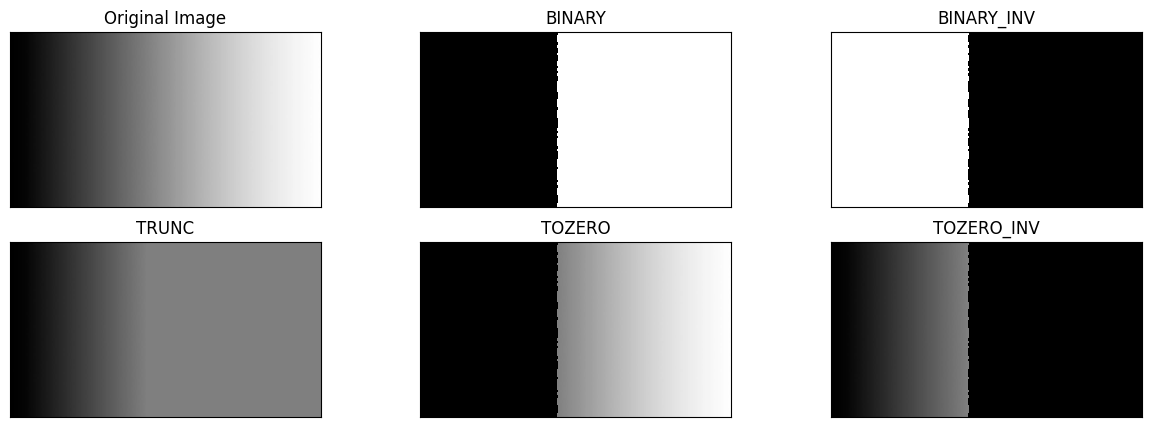

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv2.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain
# itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4. Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and the usual global threshold)

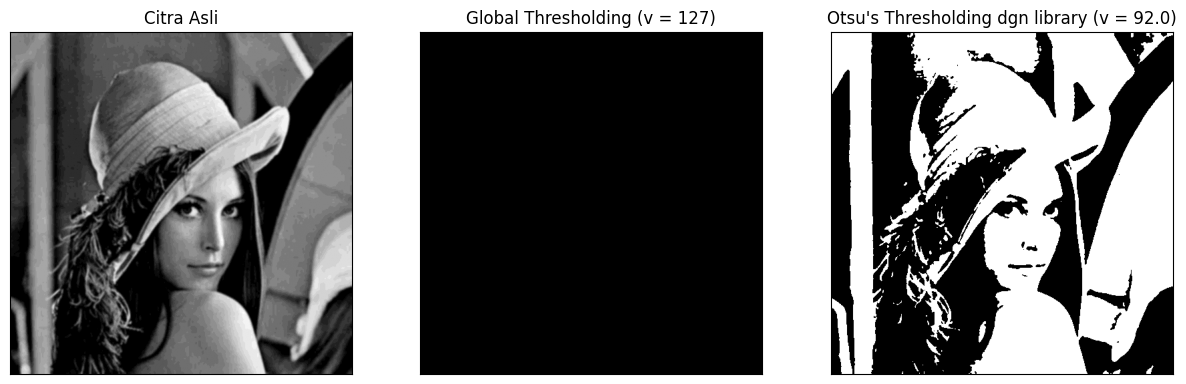

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (15,5))

for i in range(len(citra3)):
    plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

    a. You can use cv.calcHist to display a histogram.

    b. Open the folloiwng link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

    c. From the link, note that cv.calcHist has one of the parameters, namely mask.If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

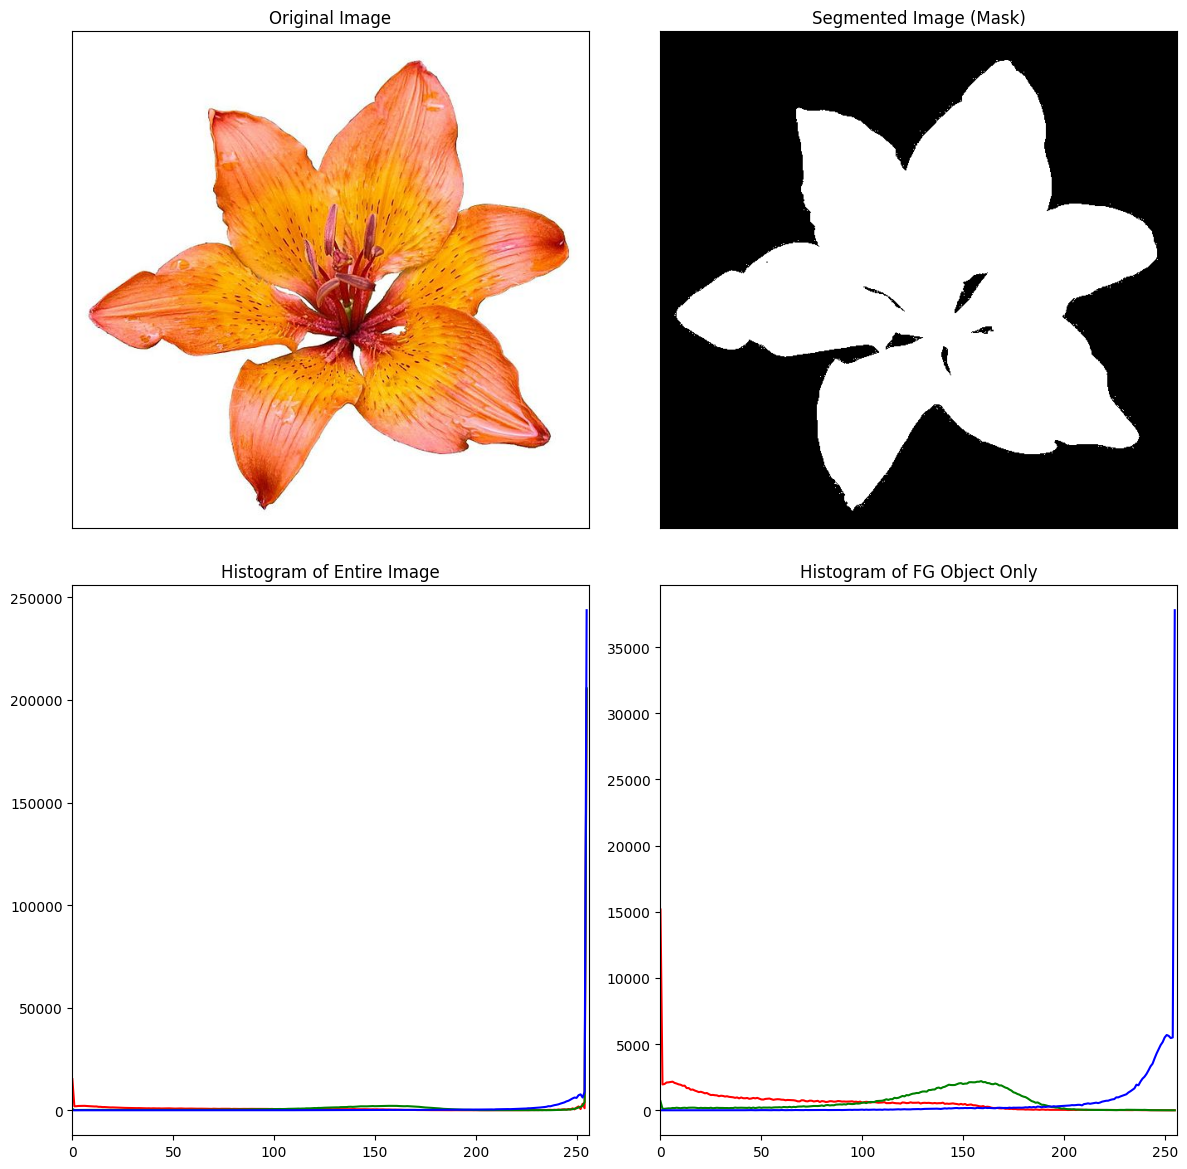

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/PCVK/Images/lily.jpg'
img = cv2.imread(img_path)
if img is None:
    print("Error: Gagal memuat gambar.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY_INV)

    colors = ('r', 'g', 'b')

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(2, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Segmented Image (Mask)')
    plt.xticks([]), plt.yticks([])

    plt.subplot(2, 2, 3)
    plt.title('Histogram of Entire Image')
    for i, col in enumerate(colors):
        hist_full = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist_full, color=col)
    plt.xlim([0, 256])

    plt.subplot(2, 2, 4)
    plt.title('Histogram of FG Object Only')
    for i, col in enumerate(colors):
        hist_masked = cv2.calcHist([img], [i], mask, [256], [0, 256])
        plt.plot(hist_masked, color=col)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

### 6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)

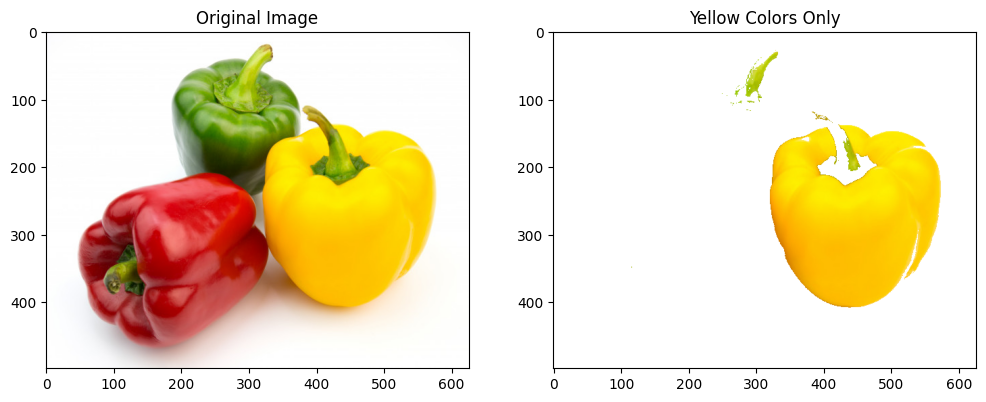

In [ ]:
# Load the image
img_path = '/content/drive/MyDrive/PCVK/Images/peppers.jpg'
img = cv2.imread(img_path)

if img is None:
    print("Error: Failed to load image.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # [cite_start]--- K-Means Preparation (per module [cite: 460-462]) ---
    # 1. Reshape image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # 2. Define criteria and K
    # (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 5  # K=5 to separate (red, green, yellow, white, shadows)

    # 3. Run K-Means
    compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert 'centers' (centroids) to uint8
    centers = np.uint8(centers)

    # --- Isolate Yellow Color ---

    # 1. Define target color (Yellow in RGB)
    target_color_rgb = [255, 255, 0]

    # 2. Find the 'center' (centroid) closest to 'yellow'
    distances = np.linalg.norm(centers - target_color_rgb, axis=1)
    yellow_cluster_index = np.argmin(distances)

    # 3. Create a new image, set all pixels that are NOT in the yellow
    #    cluster to white (255, 255, 255)

    # Copy 'pixel_values'
    masked_pixels = np.copy(pixel_values)

    # Flatten labels to 1D array
    labels_flat = labels.flatten()

    # Set all non-yellow pixels to white
    masked_pixels[labels_flat != yellow_cluster_index] = [255, 255, 255]

    # Set yellow pixels to their original color
    # (This is a modification from the prompt, to make it look better)
    original_pixels_flat = img_rgb.reshape((-1, 3))
    masked_pixels[labels_flat == yellow_cluster_index] = original_pixels_flat[labels_flat == yellow_cluster_index]

    # 4. Reshape back to the original image shape
    yellow_only_image = masked_pixels.reshape(img_rgb.shape).astype(np.uint8)

    # --- Display results ---
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(yellow_only_image)
    plt.title('Yellow Colors Only')
    plt.show()

Problem Explanation :

The main problem faced is that K-Means groups pixels purely based on their color proximity, not by the object they belong to.

1. Shadows: Areas on the yellow pepper that are in shadow may have darker RGB values, causing K-Means to group them with the "green" or "shadow" cluster instead of the "yellow" cluster. This creates "holes" in the yellow pepper.

2. Highlights: Very bright areas (highlights) on the green or red pepper might have RGB values close to white or light yellow, causing them to be incorrectly grouped as part of the yellow cluster.

### 7. Open the crossword.jpg file. With the knowledge of thresholding that you have learned. Perform binary thresholding with the best results in your opinion. Copy the code and image results in this module.

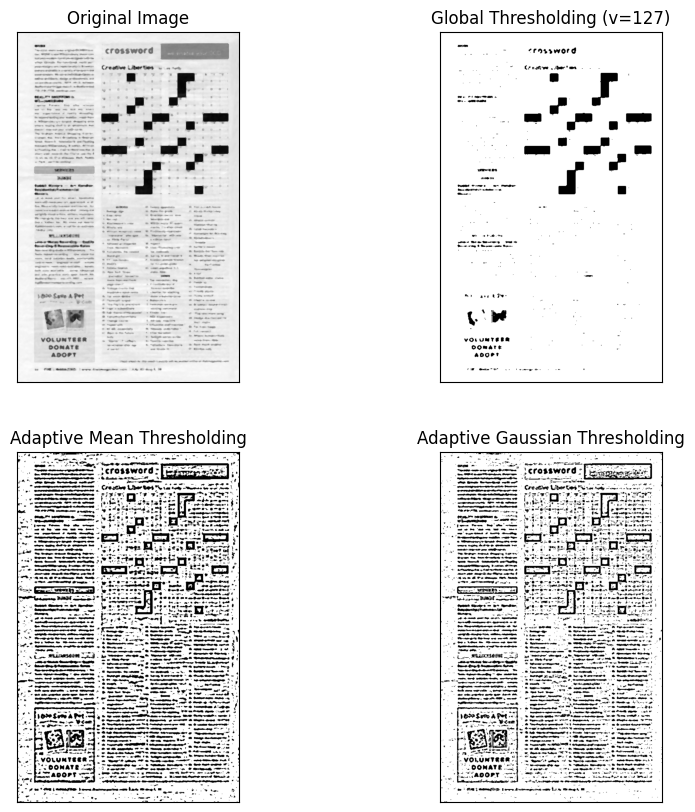

In [ ]:
img_path = '/content/drive/MyDrive/PCVK/Images/crossword.jpg'
# --- Load image ---
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Failed to load image.")
else:
    # (Optional) Apply blur to reduce noise
    img = cv2.medianBlur(img, 5)

    # --- 1. Global Thresholding (for comparison) ---
    # This will fail due to uneven lighting
    ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # --- 2. Adaptive Mean Thresholding ---
    # Threshold is the mean of the neighborhood area
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, 2)

    # --- 3. Adaptive Gaussian Thresholding ---
    # Threshold is the weighted (Gaussian) sum of the neighborhood area
    # This often gives the best results.
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

    # --- Display results (similar to Figure 10) ---
    titles = ['Original Image', 'Global Thresholding (v=127)',
              'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]

    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()